In [4]:
import pandas as pd
import sys
sys.path.append('/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT import IRT

In [5]:
import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
train_dataset = MyDataset(split='train')
val_dataset = MyDataset(split='val')
test_dataset = MyDataset(split='test')
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[0]['user_num']
item_num = dataset_info[0]['item_num']
print(user_num, item_num)

batch_size = 4096
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.010466372966304184}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.04524359813885946}]
174808 24723 50196
{'user_id': tensor(1064), 'item_id': tensor(105), 'response': tensor(1.), 'FISCED': tensor(4), 'ESCS': tensor(0.8664), 'cls_labels': [tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(0.)]}
8485 184


In [6]:
for batch in train_loader:
    print(batch)
    print(batch['user_id'])
    break

{'user_id': tensor([5095, 4465, 2973,  ..., 4909, 2831, 7335]), 'item_id': tensor([129,  80,  91,  ...,   9,  85,  86]), 'response': tensor([0., 0., 1.,  ..., 0., 1., 1.]), 'FISCED': tensor([1, 4, 1,  ..., 4, 4, 4]), 'ESCS': tensor([-1.4536, -0.5882, -0.0408,  ...,  1.7505,  1.2775,  1.1205]), 'cls_labels': [tensor([0., 0., 0.,  ..., 0., 1., 1.]), tensor([1., 1., 1.,  ..., 1., 1., 1.]), tensor([1., 1., 1.,  ..., 1., 1., 1.]), tensor([1., 1., 1.,  ..., 1., 1., 1.]), tensor([0., 0., 0.,  ..., 1., 1., 1.])]}
tensor([5095, 4465, 2973,  ..., 4909, 2831, 7335])


In [7]:
import torch
A = torch.tensor([0,1,2,3])
A.unsqueeze(-1)

tensor([[0],
        [1],
        [2],
        [3]])

In [8]:
import numpy as np
y_pred = [0.1, 0.2, 0.5, 0.6]
np.array(y_pred) >= 0.5

array([False, False,  True,  True])

In [9]:
import os
import shutil
save_path = '/zjq/zhangdacao/pisa/save/IRT_baseline'
if os.path.exists(save_path) and os.path.isdir(save_path) and os.listdir(save_path):
    shutil.rmtree(save_path)
    os.makedirs(save_path)
model = IRT(user_num=user_num, item_num=item_num, save_path=save_path)

In [10]:
model.train(train_data=train_loader, test_data=val_loader, epoch=1000, device="cuda:0", lr=0.001)

In [ ]:
import pandas as pd

def check_nan_columns(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Check for NaN values in each column
    nan_columns = df.columns[df.isna().any()].tolist()

    if nan_columns:
        print("Columns with NaN values:")
        for col in nan_columns:
            print(col)
    else:
        print("No columns with NaN values.")

# Example usage
csv_file_path = "/zjq/zhangdacao/pisa/datasets/Australia/train.csv"
check_nan_columns(csv_file_path)


Columns with NaN values:
ST013Q01TA


In [5]:
import pandas as pd
import sys
sys.path.append('/zjq/zhangdacao/pisa/datasets')
from utils import *
from NCDM_CDM import NCDM
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
index = 1
sensitive_name = 'escs'
mode = 'ours'
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[index ]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train', sensitive_name=sensitive_name)
val_dataset = MyDataset(path, split='val', sensitive_name=sensitive_name)
test_dataset = MyDataset(path, split='test', sensitive_name=sensitive_name)
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[index ]['user_num']
item_num = dataset_info[index ]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = NCDM(knowledge_n=68, exer_n=item_num, student_n=user_num, sensitive_name=sensitive_name, dataset_index=index, mode=mode)
model.load('/zjq/zhangdacao/pisa/save_new/B_ESCS_NCD_CDM_ours/model-epoch15-auc0.772-acc0.717')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.00014507418272432547, 's_num': [2, 2, 2, 2, 2]}, {'country': 'Brazil', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.012915391249048941, 's_num': [2, 2, 2, 2, 2]}]
/zjq/zhangdacao/pisa/datasets/Brazil
100319 14188 28807
{'user_id': tensor(1076), 'item_id': tensor(76), 'response': tensor(1.), 'FISCED': tensor(1), 'ESCS': tensor(0.2454), 'knowledge_list': tensor([ 8, 44, 24, 18]), 'cls_labels': [tensor(1), tensor(0), tensor(1), tensor(1), tensor(0)]}
5777 183


In [6]:
model.eval(test_loader, device='cuda:0') #NCD Brazil FISCED ours

evaluating: 100%|███████████████████████████████████████████████████| 57/57 [00:04<00:00, 11.82it/s]


pre_1: 0.2828773781419247 0.2985281866148292 0.3286587059150236 0.3021487832818412


formatting knowledge df: 100%|██████████| 28807/28807 [00:00<00:00, 175743.36it/s]
doa metrics: 68it [00:00, 444.45it/s]


(0.0030396257208671396,
 -0.030001784472954568,
 0.002521093646706163,
 0.559609019568109,
 0.7787721147838929,
 0.7209011698545492,
 0.6805620313528331,
 [0.07407407407407407,
  0.08148148148148149,
  0.5925925925925926,
  0.5481481481481482,
  0.02962962962962963])

In [14]:
model.eval(test_loader, device='cuda:0') #NCD Brazil FISCED sensitive

evaluating:   0%|                                                            | 0/57 [00:00<?, ?it/s]

formatting knowledge df: 100%|██████████| 28807/28807 [00:00<00:00, 51641.90it/s]
doa metrics: 68it [00:00, 189.93it/s]


(0.08547911042749913,
 0.12229048532782963,
 0.17447870977216517,
 0.6095257720609013,
 0.7784822924526771,
 0.7025722914569376,
 0.6517560617652188,
 [0.0, 0.0, 0.0, 0.0, 0.0])

In [8]:
model.eval(test_loader, device='cuda:0') #NCD Australia FISCED ours

formatting knowledge df: 100%|██████████| 50196/50196 [00:01<00:00, 40569.60it/s]
doa metrics: 68it [00:01, 66.61it/s] 


(0.02273904909633247,
 -0.036349152567087206,
 -0.01162629873052845,
 0.7362320232094101,
 0.8003389553965738,
 0.7275878556060243,
 0.7095807530697772,
 [0.4, 0.15, 1.0, 1.0, 0.25])

In [3]:
model.eval(test_loader, device='cuda:0') #NCD Australia FISCED sensitive

evaluating:   0%|                                                            | 0/99 [00:00<?, ?it/s]

formatting knowledge df: 100%|██████████| 50196/50196 [00:00<00:00, 53794.96it/s]
doa metrics: 68it [00:01, 66.49it/s] 


(0.002027313901140909,
 -0.013763809069189226,
 0.0038616406461989827,
 0.7167594129863007,
 0.7941209698520425,
 0.7189019045342259,
 0.6540902446781084,
 [0.0, 0.0, 0.0, 0.0, 0.0])

In [3]:
input_knowledge_point = torch.tensor([[1, 2], [0, 3]])
multi_hot = torch.zeros(input_knowledge_point.size(0), 4).to(input_knowledge_point.device)
multi_hot[input_knowledge_point] = 1.0
multi_hot

IndexError: index 2 is out of bounds for dimension 0 with size 2

In [2]:
model.eval(test_loader, device='cuda:0') #MIRT Brazil sensitive

evaluating: 100%|███████████████████████████████████████████████████| 57/57 [00:03<00:00, 15.09it/s]


(0.020721315539539997,
 -0.04119678913156424,
 -0.03132918452589384,
 0.5706506664511383,
 0.7758286603745264,
 0.7143402645190405,
 [0.0, 0.0, 0.7185185185185186, 0.6592592592592592, 0.0])

In [2]:
model.search_eval(val_loader, device='cuda:0', mode='theta_sub_sigmoid')

evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:03<00:00, 13.43it/s]


beta: -1.0 auc: 0.7066837076604716 acc: 0.5941835537758363 0.0016232377874538643 -0.0169986590678195 0.002585068494295406 0.8319239759387611


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 16.54it/s]


beta: -0.9 auc: 0.7116001777787779 acc: 0.597702544189621 0.0013045222371686684 -0.02750612308104694 0.0006640253460358236 0.83076695291679


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.32it/s]


beta: -0.8 auc: 0.7167078163424763 acc: 0.6053472475023258 0.0018471177684971387 -0.028485121624840404 -0.001846514041744074 0.8319029083963929


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.35it/s]


beta: -0.7 auc: 0.7222090535464252 acc: 0.6092707195728674 0.0008044365259642648 -0.02653194612994103 -0.0008098926943330698 0.8302507269476411


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.75it/s]


beta: -0.6 auc: 0.7278295104167046 acc: 0.6150548072644906 0.0015371947526338203 -0.025058486880195296 0.002645731020530895 0.8277523309510304


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.53it/s]


beta: -0.5 auc: 0.7333459111046542 acc: 0.6237511628847632 0.002407040147040094 -0.0446181657125958 -0.0011137046751370505 0.8258497619700768


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 16.95it/s]


beta: -0.4 auc: 0.7389188720512369 acc: 0.6287667354285483 0.0021378543722094787 -0.03814105751745034 -0.002738524624975147 0.8236789955244084


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.77it/s]


beta: -0.3 auc: 0.7445329550956356 acc: 0.6396877401609837 0.0021320817151313227 -0.043176052539508625 -0.004312294963942254 0.8195288222088879


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.88it/s]


beta: -0.2 auc: 0.7498609738186663 acc: 0.6515795008696356 0.004506658573474504 -0.04900506443210373 -0.010947166026461064 0.8135339191400585


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.42it/s]


beta: -0.1 auc: 0.7544044427485816 acc: 0.6647251547142337 0.004702493548830656 -0.057550748073300406 -0.009290918485664434 0.8034290271132376


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.73it/s]


beta: 0.0 auc: 0.7579122477068622 acc: 0.678882012700724 0.009730086874109633 -0.05221889157469589 -0.022722612128803443 0.7938253266240209


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.90it/s]


beta: 0.1 auc: 0.7599892710573701 acc: 0.6900052582615378 0.015491671399567723 -0.04442724518409907 -0.03433619687904388 0.770204581422023


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.81it/s]


beta: 0.2 auc: 0.7600705654669027 acc: 0.6926343890304575 0.0175436129123143 -0.038018224760185515 -0.037954555471639284 0.7373864656105068


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.14it/s]


beta: 0.3 auc: 0.7582856824213126 acc: 0.6872952311612668 0.023926253140652606 -0.033550851305177265 -0.05058689574953101 0.6881319157222078


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.09it/s]


beta: 0.4 auc: 0.7545828337579793 acc: 0.6705496905715326 0.018737672846547686 -0.028923858523669077 -0.04228870188203904 0.6284416299559472


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.94it/s]


beta: 0.5 auc: 0.7490289148644171 acc: 0.6525907050115277 0.01907784058031441 -0.029566862001123434 -0.045310506836845454 0.5756677254372354


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.37it/s]


beta: 0.6 auc: 0.7422530547867731 acc: 0.6342676859604417 0.018422552956444332 -0.03385590439927569 -0.044135172183712434 0.5207717684939538


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.90it/s]


beta: 0.7 auc: 0.7350386318049941 acc: 0.618088419690167 0.014423169549835612 -0.029792718045536792 -0.034071827598481375 0.4674498947570542


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.99it/s]


beta: 0.8 auc: 0.728004188325044 acc: 0.5979856813493508 0.01626290320441048 -0.02088866735994735 -0.03616093987939639 0.41098839319806596


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.89it/s]


beta: 0.9 auc: 0.7214905188512684 acc: 0.5812401407596165 0.016280521020057656 -0.011102996610884874 -0.03597736968478138 0.369972214675374


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.93it/s]


beta: 1.0 auc: 0.7159599077747769 acc: 0.5661934231282612 0.018586808980220627 -0.013783478777750019 -0.04280649472559517 0.33369090491150105


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.84it/s]


beta: 1.1 auc: 0.7115231193490623 acc: 0.5551510738987987 0.019097237058647222 -0.013578032013219103 -0.045247143489923536 0.31049702807209917


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.04it/s]


beta: 1.2 auc: 0.7081290339020687 acc: 0.5503377421833919 0.01822574036461125 -0.012117885187343837 -0.044273411733322665 0.30069359233547316


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.57it/s]


beta: 1.3 auc: 0.7055398077857971 acc: 0.5461715811187963 0.01902398330213482 -0.01263142836706959 -0.04636503469526032 0.29236796285548466


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.70it/s]


beta: 1.4 auc: 0.703568707096226 acc: 0.5439064838409579 0.018138422210692614 -0.012871973087010435 -0.044322306951885104 0.2862866349982528


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.95it/s]


beta: 1.5 auc: 0.7021928145206741 acc: 0.542329005379606 0.01867156507555126 -0.008767932624234136 -0.045731366742725044 0.28286020528293554


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.03it/s]


beta: 1.6 auc: 0.7012261539983844 acc: 0.5417222828944708 0.01830076173262663 -0.00825369630140771 -0.044822348067514284 0.28080802020855317


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.83it/s]


beta: 1.7 auc: 0.7005422054165606 acc: 0.5401852525987947 0.017776350637753055 -0.008667195959662206 -0.043523633393461436 0.2739253571653345


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 18.41it/s]


beta: 1.8 auc: 0.7000380675592449 acc: 0.538203292480686 0.018286730328666352 -0.00926139011126751 -0.044791907742175674 0.2706233293106619


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.98it/s]


beta: 1.9 auc: 0.6997567654058119 acc: 0.5378392589896048 0.01820859079053899 -0.008415568454383467 -0.04459628337726129 0.2693104327531972


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.67it/s]


beta: 2.0 auc: 0.6994799507434972 acc: 0.5373943291671722 0.018044905485232143 -0.007805867482411473 -0.04419848713749741 0.2677839569225337


(0.018044905485232143,
 -0.007805867482411473,
 -0.04419848713749741,
 0.2677839569225337,
 0.6994799507434972,
 0.5373943291671722,
 [0.08843537414965986,
  0.1360544217687075,
  0.3129251700680272,
  0.41496598639455784,
  0.23129251700680273])

In [3]:
model.search_eval(val_loader, device='cuda:0', mode='theta_sub')

evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.48it/s]


beta: -1.0 auc: 0.6735568132591464 acc: 0.553047769283663 0.0 0.0 0.0 0.8333333333333334


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.89it/s]


beta: -0.9 auc: 0.6810659346805293 acc: 0.553047769283663 0.0 0.0 0.0 0.8333333333333334


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.16it/s]


beta: -0.8 auc: 0.6897632252750325 acc: 0.553047769283663 0.0 0.0 0.0 0.8333333333333334


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.75it/s]


beta: -0.7 auc: 0.7000802982924037 acc: 0.5539780770942038 0.00013948942766414728 -0.0007828237846153607 0.0 0.83359440267335


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.05it/s]


beta: -0.6 auc: 0.7118444382743281 acc: 0.5563645188690692 0.0005331873845252098 -0.0016681777223647165 -0.0012735608762098893 0.834334674259443


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.78it/s]


beta: -0.5 auc: 0.7261644195565922 acc: 0.5651417708206933 0.0005679247088676016 -0.006114225930496375 0.0012315344453557309 0.8352071435437819


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.43it/s]


beta: -0.4 auc: 0.7428684764669811 acc: 0.5779233911742102 0.0016442913779492958 -0.01343001563147761 0.00353007027736596 0.8360344676883631


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.87it/s]


beta: -0.3 auc: 0.7606918447129511 acc: 0.6039315617036768 0.002309390222585189 -0.01936594948900827 0.005364816565449848 0.8369036414369003


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 17.46it/s]


beta: -0.2 auc: 0.7787575540261169 acc: 0.6482627512842293 0.0029456392163911523 -0.04657051208124696 -0.0066863035806891125 0.8366801930975402


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:03<00:00, 16.31it/s]


beta: -0.1 auc: 0.7922968607749261 acc: 0.7027464304493791 0.003904132365214979 -0.012520181689019028 -0.009512096994942043 0.8158399900922658


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.15it/s]


beta: 0.0 auc: 0.799574562014579 acc: 0.7233749949439793 0.00862298960583273 0.027659868490038153 0.018557918069488033 0.7382991619387849


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.16it/s]


beta: 0.1 auc: 0.7916686649680829 acc: 0.6923512518707277 0.01942543664073894 0.022592955808666437 0.021561815827161768 0.5814768045275645


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 17.34it/s]


beta: 0.2 auc: 0.7628333376906563 acc: 0.614731221939085 0.014984842224450639 0.0035854366627004336 0.0060315433647052386 0.4010092676827312


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.18it/s]


beta: 0.3 auc: 0.730893738791614 acc: 0.5625530882174493 0.013049846446185192 -0.004160140547466162 -0.029713657368202195 0.31139532213659993


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.83it/s]


beta: 0.4 auc: 0.712606266006957 acc: 0.5421672127169033 0.016964282783569717 -0.006365087709186465 -0.041488238812405154 0.2766268614637977


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.23it/s]


beta: 0.5 auc: 0.7049048145550914 acc: 0.538324636977713 0.017532192201725583 -0.007382279556929897 -0.04294334713457759 0.26926344930525264


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.19it/s]


beta: 0.6 auc: 0.7022730102229415 acc: 0.5363426768596045 0.018140564216914106 -0.007825738536974242 -0.04443503782138969 0.26556298242028314


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.12it/s]


beta: 0.7 auc: 0.7014432876763103 acc: 0.5359786433685232 0.01845088245414743 -0.007809265432552996 -0.04519511839765733 0.2652777384416565


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.18it/s]


beta: 0.8 auc: 0.7012194128336289 acc: 0.5359786433685232 0.018469866157058083 -0.0077893943779902275 -0.04524142970224676 0.2652777384416565


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.12it/s]


beta: 0.9 auc: 0.70125943622418 acc: 0.5359786433685232 0.018606626625106516 -0.0077893943779902275 -0.04557632588443028 0.2656482157674112


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.08it/s]


beta: 1.0 auc: 0.7013935811006465 acc: 0.5359786433685232 0.01843898196856118 -0.007805867482411473 -0.04516541376266847 0.26519261730401383


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.76it/s]


beta: 1.1 auc: 0.7014155287710727 acc: 0.5359786433685232 0.018556612673889007 -0.007825738536974242 -0.0454538865223576 0.26556298242028314


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.04it/s]


beta: 1.2 auc: 0.7014556547517599 acc: 0.5359786433685232 0.01841995427352176 -0.007825738536974242 -0.04511910245807904 0.26519261730401383


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.04it/s]


beta: 1.3 auc: 0.7014579315909116 acc: 0.5353719208833879 0.018474391929380465 -0.00764282733223938 -0.045242663871512545 0.26226601880941075


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.12it/s]


beta: 1.4 auc: 0.701401791620901 acc: 0.5352101282206851 0.017902188254510253 -0.00701645714746018 -0.043823455725361726 0.2604489095636486


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 20.93it/s]


beta: 1.5 auc: 0.7013144510120516 acc: 0.5345225094041985 0.018063905337780007 -0.008294196770513101 -0.04412165742500063 0.2571618617426206


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.19it/s]


beta: 1.6 auc: 0.701241016330695 acc: 0.5337135460906848 0.0174228939952486 -0.007007371296780397 -0.04257931632739553 0.2543415508145592


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.10it/s]


beta: 1.7 auc: 0.7011480431924328 acc: 0.5331068236055495 0.017773395973447008 -0.007894682743098055 -0.043517656712566244 0.2539689851082192


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.83it/s]


beta: 1.8 auc: 0.7011017915878074 acc: 0.5331068236055495 0.017877422571337866 -0.007910077251396481 -0.043779900492320944 0.2542598138364525


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.14it/s]


beta: 1.9 auc: 0.7010230619316796 acc: 0.5330663754398738 0.01764234562287184 -0.0085994758361813 -0.043196661237715595 0.2525152150308068


evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 21.21it/s]


beta: 2.0 auc: 0.7009821549422136 acc: 0.5323383084577115 0.017643567632765873 -0.009075840096441565 -0.04318978777282645 0.2505694760820046


(0.017643567632765873,
 -0.009075840096441565,
 -0.04318978777282645,
 0.2505694760820046,
 0.7009821549422136,
 0.5323383084577115,
 [0.10204081632653061,
  0.17687074829931973,
  0.3469387755102041,
  0.3197278911564626,
  0.1564625850340136])

In [ ]:
import torch
theta_pred = torch.tensor([0.1, 0.5, 0.4, 0.6])
con_theta_pred = torch.tensor([0.2, 0.4, 0.4, 0.6])
torch.where(theta_pred > con_theta_pred, torch.tensor(1), torch.tensor(0))

tensor([0, 1, 0, 0])

In [11]:
alpha.shape, Uf.shape

(torch.Size([2, 1]), torch.Size([2, 3]))

In [4]:
import torch
torch.sigmoid(torch.tensor([-30]))

tensor([9.3576e-14])

In [10]:
import torch
alpha = torch.tensor([0.1, 0.5]).unsqueeze(1)
Uf = torch.tensor([[1, 1, 1], [2, 2, 2]])
Ud = torch.tensor([[2, 2, 2], [1, 1, 1]])
theta = (1-alpha) * Uf + alpha * Ud
theta

tensor([[1.1000, 1.1000, 1.1000],
        [1.5000, 1.5000, 1.5000]])

In [ ]:
0.9, 0.9 1, 1
0.2, 0.2 0.5 0.5

In [23]:
import pandas as pd
import sys
sys.path.append('/zjq/zhangdacao/pisa/datasets')
from utils import *
from IRT_CDM import IRT
import os

import json
from torch.utils.data import DataLoader

with open('/zjq/zhangdacao/pisa/datasets/dataset_info.json', 'r', encoding='utf-8') as file:
    dataset_info = json.load(file)
print(dataset_info)
root = '/zjq/zhangdacao/pisa/datasets'
country = dataset_info[0]['country']
path = os.path.join(root, country)
print(path)
train_dataset = MyDataset(path, split='train')
val_dataset = MyDataset(path, split='val')
test_dataset = MyDataset(path, split='test')
print(len(train_dataset), len(val_dataset), len(test_dataset))
print(train_dataset[0])
user_num = dataset_info[0]['user_num']
item_num = dataset_info[0]['item_num']
print(user_num, item_num)

batch_size = 512
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=False)

model = IRT(user_num=user_num, item_num=item_num)
model.load('/zjq/zhangdacao/pisa/save_new/A_ESCS_MIRT_CDM_sensitive_lr001/model-epoch15-auc0.779-acc0.72')

[{'country': 'Australia', 'user_num': 8485, 'item_num': 184, 'escs_mean': 0.010466372966304184, 's_num': [6, 4, 2, 2, 4]}, {'country': 'Australia', 'user_num': 5777, 'item_num': 183, 'escs_mean': 0.04524359813885946, 's_num': [6, 4, 2, 2, 4]}]
/zjq/zhangdacao/pisa/datasets/Australia
174808 24723 50196
{'user_id': tensor(1064), 'item_id': tensor(105), 'response': tensor(1.), 'FISCED': tensor(4), 'ESCS': tensor(0.8664), 'cls_labels': [tensor(5), tensor(3), tensor(1), tensor(1), tensor(0)]}
8485 184


In [24]:
model.eval(val_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 49/49 [00:02<00:00, 19.82it/s]


(0.012205163101641547,
 -0.02047569119560838,
 -0.028897482844980837,
 0.734928127011371,
 0.7973171355642606,
 0.7207458641750597,
 [0.16326530612244897,
  0.22448979591836735,
  0.32653061224489793,
  0.38095238095238093,
  0.08163265306122448])

In [3]:
model.eval(test_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 19.52it/s]


(0.006398924265215282,
 -0.012172843380473475,
 -0.014877176158781258,
 0.7366217439005351,
 0.7987015725139487,
 0.7226472228862858,
 [0.3, 0.45, 1.0, 0.95, 0.75])

In [6]:
model.eval(test_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 19.12it/s]


(0.012890166692559418,
 -0.05376003648243666,
 -0.027706679080509056,
 0.7450697881261819,
 0.7935281962454934,
 0.7183440911626424,
 [0.2, 0.15, 1.0, 1.0, 0.65])

In [9]:
model.eval(test_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:05<00:00, 18.66it/s]


(0.010863340410848367,
 -0.02775558377364651,
 -0.022101031278945027,
 0.7443932812756128,
 0.7995004282445148,
 0.7247390230297235,
 [0.0, 0.1, 0.35, 0.3, 0.05])

In [12]:
model.eval(test_loader, device='cuda:0')

evaluating: 100%|███████████████████████████████████████████████████| 99/99 [00:04<00:00, 20.44it/s]


(0.014094717915541897,
 -0.03843066258861305,
 -0.03286412401603045,
 0.7414828261843125,
 0.7964449759146602,
 0.7213921428002231,
 [0.3, 0.15, 0.95, 1.0, 0.85])

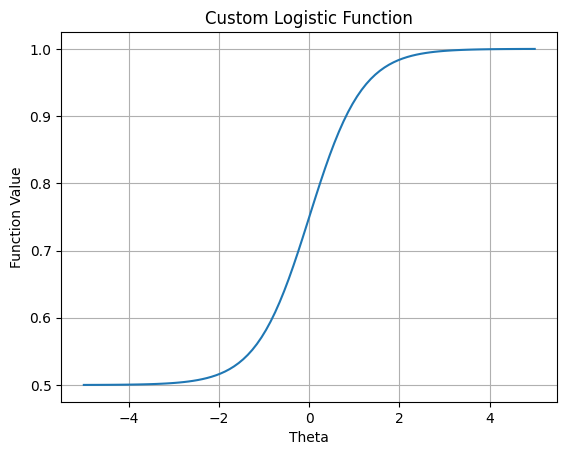

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# 定义函数
def custom_logistic(theta, c, D, a, b):
    return c + (1 - c) / (1 + torch.exp(-D * a * (theta - b)))

# 设置参数
c_value = 0.5
D_value = 1.7
a_value = 1.0
b_value = 0

# 生成一些 theta 的值
theta_values = torch.linspace(-5, 5, 100)

# 计算函数值
function_values = custom_logistic(theta_values, c_value, D_value, a_value, b_value)

# 绘制图像
plt.plot(theta_values.numpy(), function_values.numpy())
plt.title('Custom Logistic Function')
plt.xlabel('Theta')
plt.ylabel('Function Value')
plt.grid(True)
plt.show()
